# Aprendizaje Supervisado: Laboratorio 1 --- Mario Ferreyra

---
---
## Ejercicio 1: SVM con Kernel y Regularización

En este ejercicio se trabajará con datos que esconden un patrón. Los datos mezclan columnas con valores enteros, flotantes y booleanos.

Debe analizar los datos de entrenamiento para encontrar el patrón, y luego entrenar una SVM que explique a la perfección esos datos (accuracy 1.0 en train).

Por último, deberá evaluar la SVM en los datos de test, y modificar los parámetros de regularización hasta encontrar una configuración que dé una accuracy mayor a 0.9.

### Zona de Imports

In [1]:
import pandas as pd
import numpy as np

from sklearn.svm import LinearSVC, SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

%matplotlib inline

### Ejercicio 1a:

In [2]:
# Cargar datos de entrenamiento
train = pd.read_csv('lab1/ej1_train.csv')
X_train = train.iloc[:, :-1]
y_train = train['TARGET']

# Cargar datos de evaluación
test = pd.read_csv('lab1/ej1_test.csv')
X_test = test.iloc[:, :-1]
y_test = test['TARGET']

Primero imprima una descripción básica de los datos.

In [3]:
print("Shape Train", train.shape)
print("Shape Train", test.shape)

Shape Train (400, 18)
Shape Train (100, 18)


In [4]:
print("X_train")
print("=======")
display(X_train.head())

print("y_train")
print("=======")
display(y_train.head())

X_train


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-15.0,20.0,26.0,17.0,117.0,-1.099921,-0.366696,0.136307,-0.777322,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,35.0,87.0,-17.0,54.0,38.0,-0.507798,-0.774667,-0.879107,-1.159231,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,82.0,75.0,116.0,87.0,130.0,-0.219868,0.157875,0.386982,0.150254,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,133.0,138.0,87.0,124.0,61.0,0.371992,-0.157556,-0.484258,-0.109378,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-17.0,23.0,17.0,16.0,109.0,-1.099966,-0.436268,0.028073,-0.869315,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


y_train


0   -1.0
1   -1.0
2    1.0
3   -1.0
4   -1.0
Name: TARGET, dtype: float64

In [5]:
print("Describe Train")
print("==============")
display(train.describe())

print("Describe Test")
print("=============")
display(test.describe())

Describe Train


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,TARGET
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,100.567500,101.035000,98.930000,100.445000,98.487500,0.007970,-0.009065,-0.019228,-0.009865,0.03500,0.08750,0.172500,0.237500,0.220000,0.132500,0.075000,0.040000,-0.00500
std,86.549654,49.517155,91.403921,62.199267,36.299366,0.782708,0.560037,0.514925,0.924287,0.18401,0.28292,0.378288,0.426084,0.414765,0.339458,0.263721,0.196205,1.00124
min,-93.000000,-10.000000,-115.000000,-39.000000,11.000000,-1.725988,-1.300851,-1.244842,-2.168412,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
25%,46.000000,73.000000,37.500000,61.750000,73.000000,-0.488926,-0.366255,-0.382066,-0.646990,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
50%,100.500000,100.000000,100.000000,100.000000,99.500000,0.005970,-0.010120,-0.013890,0.000883,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
75%,155.250000,133.250000,153.250000,140.000000,122.000000,0.510675,0.314739,0.300218,0.544438,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
max,299.000000,217.000000,323.000000,243.000000,185.000000,1.785821,1.369928,1.217912,2.240643,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


Describe Test


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,TARGET
count,100.0000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.00000,100.000000,100.00000
mean,96.1300,96.360000,99.870000,97.160000,102.720000,-0.040512,0.004926,0.033704,-0.004260,0.040000,0.060000,0.15000,0.200000,0.280000,0.170000,0.08000,0.020000,0.14000
std,90.9948,51.825566,93.805694,65.441426,33.713013,0.823741,0.568685,0.485918,0.950852,0.196946,0.238683,0.35887,0.402015,0.451261,0.377525,0.27266,0.140705,0.99514
min,-103.0000,-18.000000,-121.000000,-46.000000,21.000000,-1.809384,-1.326568,-1.077257,-2.231523,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.00000
25%,32.5000,63.000000,38.750000,51.000000,80.500000,-0.607998,-0.325616,-0.302578,-0.646475,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.00000
50%,93.5000,97.000000,98.500000,96.000000,104.000000,-0.034198,0.010731,0.067117,-0.038218,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,1.00000
75%,162.5000,129.500000,164.750000,144.250000,129.000000,0.558627,0.446693,0.376144,0.658064,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.00000,0.000000,1.00000
max,297.0000,214.000000,298.000000,242.000000,173.000000,1.782430,1.209983,1.084993,1.995559,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000


In [6]:
print("Counter y_train =", Counter(y_train))
print("Counter y_test =", Counter(y_test))

Counter y_train = Counter({-1.0: 201, 1.0: 199})
Counter y_test = Counter({1.0: 57, -1.0: 43})


Luego, calcule y grafique un mapa de calor con la correlación entre los distintos features.

Text(0.5,1,'Heatmap Correlation')

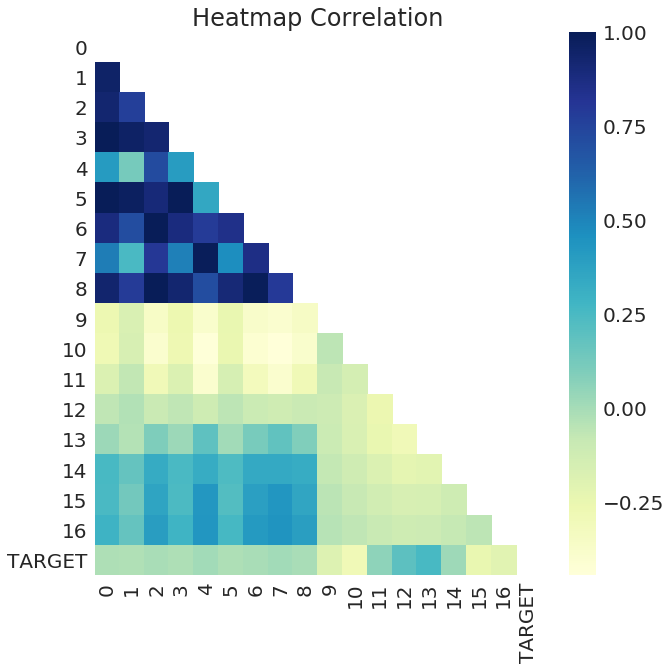

In [7]:
# COMPLETAR: calcular y graficar correlación entre features
# AYUDA: https://www.kaggle.com/pierra/credit-card-dataset-svm-classification

sns.set(font_scale=2, style='white')

# Generate a mask for the upper triangle
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train.corr(), mask=mask, cmap="YlGnBu", ax=ax)
ax.set_title('Heatmap Correlation')

**Preguntas:**
- ¿Qué observa?

Podemos observar que hay una gran "concentracion de calor" en el cuadrante superior del mapa.

- ¿Qué conclusiones puede extraer?

Lo que podemos concluir que hay una fuerte correlacion entre los primeros 9 features.

---
Por último, reduzca la dimensionalidad de los datos a dos dimensiones y grafique los puntos.

Shape PCA DataFrame = (400, 3)


,PCA_1,PCA_2,TARGET
0,-169.452309,61.923209,-1.0
1,-140.637635,-63.051982,-1.0
2,-9.971975,48.867243,1.0
3,28.025112,-61.117568,-1.0
4,-176.649479,51.593234,-1.0


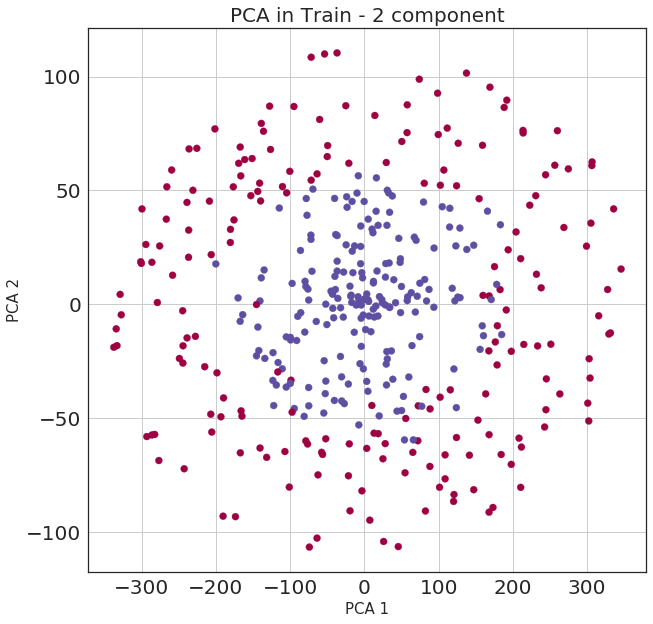

In [8]:
# COMPLETAR: reducir dimensionalidad y graficar

# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
pca = PCA(n_components=2)
#pca.fit(X_train)
pca_train_ft = pca.fit_transform(X_train)

pca_train_df = pd.DataFrame(data=pca_train_ft, columns=['PCA_1', 'PCA_2'])
pca_train_df = pd.concat([pca_train_df, y_train], axis=1)

print("Shape PCA DataFrame =", pca_train_df.shape)
display(pca_train_df.head())

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PCA 1', fontsize=15)
ax.set_ylabel('PCA 2', fontsize=15)
ax.set_title('PCA in Train - 2 component', fontsize=20)

#ax.scatter(pca_df['PCA_1'], pca_df['PCA_2'], c=['r' if item == 1.0 else 'b' for item in pca_df['TARGET']])
ax.scatter(pca_train_df['PCA_1'], pca_train_df['PCA_2'], c=pca_train_df['TARGET'], cmap=plt.cm.Spectral)
ax.grid()

In [9]:
# NO PRESTAR ATENCION A ESTO (FALTA EJE Z)

#fig = plt.figure(figsize=(10, 10))
#ax = fig.add_subplot(111, projection='3d')

#ax.scatter(pca_train_df['PCA_1'], pca_train_df['PCA_2'], pca_train_df['TARGET'], c=pca_train_df['TARGET'], cmap=plt.cm.Spectral)
#ax.set_xlabel('PCA 1')
#ax.set_ylabel('PCA 2')

#plt.show()

**Preguntas:**
- ¿Qué observa?

Observamos que hay una gran concentracion de una de las clase en el centro del grafico.

- ¿Qué conclusiones puede extraer?

No es linealmente separable ya que no existe un hiperplano capaz de separar las dos clases.  
Para poder realizar una buena clasificacion, deberiamos llevar llevar el problema a otro espacio en donde sea linealmente separable.

---
### Ejercico 1b:

Primero calcule la accuracy sobre train para una SVM con kernel lineal.

In [10]:
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
clf = LinearSVC(random_state=0)  # CAMBIAR!
clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)
print('Accuracy in Train =', accuracy_score(y_train, y_pred))

Accuracy in Train = 0.6125


In [11]:
print("Training Error = {:.2f}".format(1 - clf.score(X_train, y_train)))
print("Test Error = {:.4f}".format(1 - clf.score(X_test, y_test)))

Training Error = 0.39
Test Error = 0.3300


**Preguntas:**
- ¿Cuál es la accuracy?

La accuracy es del 61.25%

- ¿Qué problema tiene el modelo? ¿De sesgo (bias) o de varianza?

El modelo sufre de bias, ya que Training Error $\approx$ Test Error y a su vez el Training Error es alto.

Modifique la SVM para lograr una accuracy en train de 1.0.

In [12]:
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
clf = SVC(random_state=0, kernel='rbf')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)
print('Accuracy in Train =', accuracy_score(y_train, y_pred))

Accuracy in Train = 1.0


---
### Ejercicio 1c:

Evalúe la SVM del ítem anterior sobre los datos de test.

In [13]:
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
clf = SVC(random_state=0, kernel='rbf')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)
print('Accuracy in Train =', accuracy_score(y_train, y_pred))

Accuracy in Train = 1.0


Shape PCA DataFrame = (100, 3)


,PCA_1,PCA_2,TARGET
0,-307.846400,-28.667996,-1.0
1,45.518208,-4.414905,1.0
2,282.696863,30.433540,-1.0
3,-119.535418,22.669424,1.0
4,82.357500,-16.779122,1.0


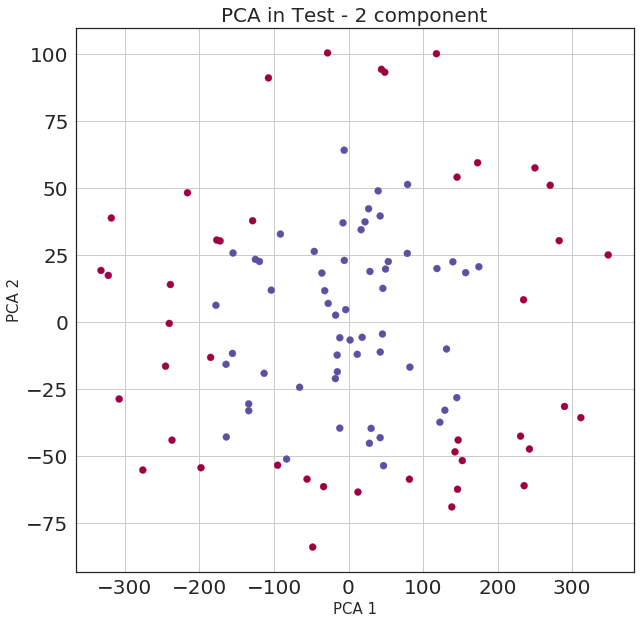

In [14]:
pca = PCA(n_components=2)
pca_test_ft = pca.fit_transform(X_test)

pca_test_df = pd.DataFrame(data=pca_test_ft, columns=['PCA_1', 'PCA_2'])
pca_test_df = pd.concat([pca_test_df, y_test], axis=1)

print("Shape PCA DataFrame =", pca_test_df.shape)
display(pca_test_df.head())

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PCA 1', fontsize=15)
ax.set_ylabel('PCA 2', fontsize=15)
ax.set_title('PCA in Test - 2 component', fontsize=20)

ax.scatter(pca_test_df['PCA_1'], pca_test_df['PCA_2'], c=pca_test_df['TARGET'], cmap=plt.cm.Spectral)
ax.grid()

In [15]:
# NO PRESTAR ATENCION A ESTO (FALTA EJE Z)

#fig = plt.figure(figsize=(10, 10))
#ax = fig.add_subplot(111, projection='3d')

#ax.scatter(pca_test_df['PCA_1'], pca_test_df['PCA_2'], pca_test_df['TARGET'], c=pca_test_df['TARGET'], cmap=plt.cm.Spectral)
#ax.set_xlabel('PCA 1')
#ax.set_ylabel('PCA 2')

#plt.show()

**Preguntas:**
- ¿Cuál es la accuracy en test?

La accuracy es de 70%

- ¿Qué problema tiene el modelo? ¿De sesgo (bias) o de varianza?

El modelo sufre de varianza (overfitting), ya que Training Error $\ll$ Test Error

In [16]:
print("Training Error = {:.2f}".format(1 - clf.score(X_train, y_train)))
print("Test Error = {:.4f}".format(1 - clf.score(X_test, y_test)))

Training Error = 0.00
Test Error = 0.3000


Modifique parámetros de la SVM para lograr una accuracy en test mayor a 0.9.  
La accuracy en train puede ser menos de 1.0.  
Puede buscar los valores apropiados a mano o usar grid search.

In [17]:
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

cv = 5  # 5-fold cross-validation

exploring_params = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
    'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
}

clf = SVC(random_state=0, kernel='rbf')
model = GridSearchCV(clf, exploring_params, cv=cv, scoring='accuracy')
model.fit(X_train, y_train)

print("\tPuntajes de la grilla:")
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
   print("\t\tAccuracy: %0.3f (+/- %0.03f) para los parámetros %r" % (mean, std**2, params))

print("\t* Mejor conjunto de parámetros:")
print("\t\t{}".format(model.best_params_))

print("\t* Mejor Accuracy:")
print("\t\t{}".format(model.best_score_))

best_params = model.best_params_

	Puntajes de la grilla:
		Accuracy: 0.502 (+/- 0.000) para los parámetros {'C': 0.001, 'gamma': 0.001}
		Accuracy: 0.502 (+/- 0.000) para los parámetros {'C': 0.001, 'gamma': 0.01}
		Accuracy: 0.502 (+/- 0.000) para los parámetros {'C': 0.001, 'gamma': 0.1}
		Accuracy: 0.502 (+/- 0.000) para los parámetros {'C': 0.001, 'gamma': 1.0}
		Accuracy: 0.502 (+/- 0.000) para los parámetros {'C': 0.001, 'gamma': 10.0}
		Accuracy: 0.502 (+/- 0.000) para los parámetros {'C': 0.001, 'gamma': 100.0}
		Accuracy: 0.502 (+/- 0.000) para los parámetros {'C': 0.001, 'gamma': 1000.0}
		Accuracy: 0.502 (+/- 0.000) para los parámetros {'C': 0.01, 'gamma': 0.001}
		Accuracy: 0.502 (+/- 0.000) para los parámetros {'C': 0.01, 'gamma': 0.01}
		Accuracy: 0.502 (+/- 0.000) para los parámetros {'C': 0.01, 'gamma': 0.1}
		Accuracy: 0.502 (+/- 0.000) para los parámetros {'C': 0.01, 'gamma': 1.0}
		Accuracy: 0.502 (+/- 0.000) para los parámetros {'C': 0.01, 'gamma': 10.0}
		Accuracy: 0.502 (+/- 0.000) para los parám

In [18]:
clf = SVC(random_state=0, kernel='rbf', **best_params)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)
print('Accuracy in Train =', accuracy_score(y_train, y_pred))

y_true, y_pred = y_test, clf.predict(X_test)
print('Accuracy in Test  =', accuracy_score(y_true, y_pred))

Accuracy in Train = 0.945
Accuracy in Test  = 0.9


---
---
## Ejercicio 2: Revisitando el Titanic

Este ejercicio se basa en el siguiente análisis de datos visto en clase:

- https://www.kaggle.com/zlatankr/titanic-random-forest-82-78/notebook

Aquí, se logra entrenar una Random Forest con un out-of-bag score de 0.8294.

---
### Ejercicio 2a:

El objetivo de este ejercicio es ver cuánto da el score si no se quiere hacer ninguna preparación de los datos.

Para esto, deben eliminarse las columnas que no tienen datos numéricos y las que tienen datos incompletos, ya que los algoritmos de aprendizaje automático no saben lidiar con ellos.

In [19]:
# Cargar los datos
train = pd.read_csv('titanic/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [20]:
print("Shape Train =", train.shape)

Shape Train = (891, 12)


In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
# COMPLETAR: eliminar las columnas que no tienen números, y las que tienen datos incompletos.

print("# NaN in 'Survived' with dropna = {} | Type 'Survived' = {}".format(train.Survived.dropna().shape[0], train.Survived.dtype))
print("# NaN in 'Pclass' with dropna   = {} | Type 'Pclass' = {}".format(train.Pclass.dropna().shape[0], train.Pclass.dtype))
print("# NaN in 'Name' with dropna     = {} | Type 'Name' = {}".format(train.Name.dropna().shape[0], train.Name.dtype))
print("# NaN in 'Sex' with dropna      = {} | Type 'Sex' = {}".format(train.Sex.dropna().shape[0], train.Sex.dtype))
print("# NaN in 'Age' with dropna      = {} | Type 'Age' = {}".format(train.Age.dropna().shape[0], train.Age.dtype))
print("# NaN in 'SibSp' with dropna    = {} | Type 'SibSp' = {}".format(train.SibSp.dropna().shape[0], train.SibSp.dtype))
print("# NaN in 'Parch' with dropna    = {} | Type 'Parch' = {}".format(train.Parch.dropna().shape[0], train.Parch.dtype))
print("# NaN in 'Ticket' with dropna   = {} | Type 'Ticket' = {}".format(train.Ticket.dropna().shape[0], train.Ticket.dtype))
print("# NaN in 'Fare' with dropna     = {} | Type 'Fare' = {}".format(train.Fare.dropna().shape[0], train.Fare.dtype))
print("# NaN in 'Cabin' with dropna    = {} | Type 'Cabin' = {}".format(train.Cabin.dropna().shape[0], train.Cabin.dtype))
print("# NaN in 'Embarked' with dropna = {} | Type 'Embarked' = {}".format(train.Embarked.dropna().shape[0], train.Embarked.dtype))

# NaN in 'Survived' with dropna = 891 | Type 'Survived' = int64
# NaN in 'Pclass' with dropna   = 891 | Type 'Pclass' = int64
# NaN in 'Name' with dropna     = 891 | Type 'Name' = object
# NaN in 'Sex' with dropna      = 891 | Type 'Sex' = object
# NaN in 'Age' with dropna      = 714 | Type 'Age' = float64
# NaN in 'SibSp' with dropna    = 891 | Type 'SibSp' = int64
# NaN in 'Parch' with dropna    = 891 | Type 'Parch' = int64
# NaN in 'Ticket' with dropna   = 891 | Type 'Ticket' = object
# NaN in 'Fare' with dropna     = 891 | Type 'Fare' = float64
# NaN in 'Cabin' with dropna    = 204 | Type 'Cabin' = object
# NaN in 'Embarked' with dropna = 889 | Type 'Embarked' = object


In [23]:
del train['PassengerId']  # Eliminar ids

for column in "Name Sex Age Ticket Cabin Embarked".split():
    del train[column]

In [24]:
train.head()

,Survived,Pclass,SibSp,Parch,Fare
0,0,3,1,0,7.2500
1,1,1,1,0,71.2833
2,1,3,0,0,7.9250
3,1,1,1,0,53.1000
4,0,3,0,0,8.0500


In [25]:
# Entrenar la misma Random Forest, e imprimir el out-of-bag score
rf = RandomForestClassifier(criterion='gini',
                            n_estimators=700,
                            min_samples_split=10,
                            min_samples_leaf=1,
                            max_features='auto',
                            oob_score=True,
                            random_state=1,
                            n_jobs=-1)

rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("Out-of-bag (OOB) = %.4f" % rf.oob_score_)

Out-of-bag (OOB) = 0.7172


---
### Ejercicio 2b:

En este ejercicio deberá hacer tres mejoras en la preparación de los datos:

- Completar la columna "Age" y usarla.
- Agregar una nueva columna con el largo del nombre.
- Convertir la columna "Sex" a valores numéricos y usarla.

Calcular el OOB score de cada una de las mejoras por separado.

#### $\Longrightarrow$ Mejora 1: Completar la columna "Age" y usarla. $\Longleftarrow$

In [26]:
# Cargar nuevamente los datos
train = pd.read_csv('titanic/train.csv')

In [27]:
# COMPLETAR: completar con el valor medio los datos faltantes en el campo Age
print("# NaN in Age column =", train['Age'].isnull().sum())
#train['Age'].mean()
train['Age'] = train['Age'].fillna(train['Age'].mean())

# NaN in Age column = 177


In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
# COMPLETAR: eliminar las columnas que deban ser eliminadas
del train['PassengerId']

for column in "Name Sex Ticket Cabin Embarked".split():
    del train[column]

In [30]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [31]:
# EJECUTAR ESTO TRES VECES, UNA VEZ PARA CADA MEJORA.
# Entrenar el Random Forest, e imprimir out-of-bag score
rf = RandomForestClassifier(criterion='gini',
                            n_estimators=700,
                            min_samples_split=10,
                            min_samples_leaf=1,
                            max_features='auto',
                            oob_score=True,
                            random_state=1,
                            n_jobs=-1)

rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
oob_mejora1 = rf.oob_score_
print("Out-of-bag (OOB) = %.4f" % oob_mejora1)

Out-of-bag (OOB) = 0.7250


#### $\Longrightarrow$ Mejora 2: Agregar una nueva columna con el largo del nombre. $\Longleftarrow$

In [32]:
# Cargar nuevamente los datos
train = pd.read_csv('titanic/train.csv')

In [33]:
# COMPLETAR: agregar columna con el largo del nombre
train['Name_Length'] = train['Name'].str.len()

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Length
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,24


In [35]:
# COMPLETAR: eliminar las columnas que deban ser eliminadas
del train['PassengerId']

for column in "Name Sex Age Ticket Cabin Embarked".split():
    del train[column]

In [36]:
train.head()

,Survived,Pclass,SibSp,Parch,Fare,Name_Length
0,0,3,1,0,7.2500,23
1,1,1,1,0,71.2833,51
2,1,3,0,0,7.9250,22
3,1,1,1,0,53.1000,44
4,0,3,0,0,8.0500,24


In [37]:
# EJECUTAR ESTO TRES VECES, UNA VEZ PARA CADA MEJORA.
# Entrenar el Random Forest, e imprimir out-of-bag score
rf = RandomForestClassifier(criterion='gini',
                            n_estimators=700,
                            min_samples_split=10,
                            min_samples_leaf=1,
                            max_features='auto',
                            oob_score=True,
                            random_state=1,
                            n_jobs=-1)

rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
oob_mejora2 = rf.oob_score_
print("Out-of-bag (OOB) = %.4f" % oob_mejora2)

Out-of-bag (OOB) = 0.7407


#### $\Longrightarrow$ Mejora 3: Convertir la columna "Sex" a valores numéricos y usarla. $\Longleftarrow$

In [38]:
# Cargar nuevamente los datos
train = pd.read_csv('titanic/train.csv')

In [39]:
print(train.Sex.unique())

# COMPLETAR: poner 1 en lugar de 'female' y 0 en lugar de 'male'
# AYUDA: DEFINIR LA FUNCIÓN f Y HACER: train['Sex'] = train['Sex'].apply(f)
train['Sex'] = train['Sex'].apply(lambda x: 1 if x == 'female' else 0)

['male' 'female']


In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [41]:
# COMPLETAR: eliminar las columnas que deban ser eliminadas
del train['PassengerId']
del train['Name']
del train['Age']
del train['Ticket']
del train['Cabin']
del train['Embarked']

In [42]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,0,1,0,7.2500
1,1,1,1,1,0,71.2833
2,1,3,1,0,0,7.9250
3,1,1,1,1,0,53.1000
4,0,3,0,0,0,8.0500


In [43]:
# EJECUTAR ESTO TRES VECES, UNA VEZ PARA CADA MEJORA.
# Entrenar el Random Forest, e imprimir out-of-bag score
rf = RandomForestClassifier(criterion='gini',
                            n_estimators=700,
                            min_samples_split=10,
                            min_samples_leaf=1,
                            max_features='auto',
                            oob_score=True,
                            random_state=1,
                            n_jobs=-1)

rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
oob_mejora3 = rf.oob_score_
print("Out-of-bag (OOB) = %.4f" % oob_mejora3)

Out-of-bag (OOB) = 0.8025


In [44]:
print("Out-of-bag (OOB):")
print("\tMejora 1 = %.4f" % oob_mejora1)
print("\tMejora 2 = %.4f" % oob_mejora2)
print("\tMejora 3 = %.4f" % oob_mejora3)

Out-of-bag (OOB):
	Mejora 1 = 0.7250
	Mejora 2 = 0.7407
	Mejora 3 = 0.8025


**Responda**: ¿Cuál de las tres mejoras aporta más?

La Mejora 3 es la que aporta más, ya que el OOB obtenido es mucho mayor que las otras mejoras.